In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_dP_r

In [3]:
#Read data ---#1
#Input = "2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt"
Input = "2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

#len_x = len(x)
#print(len_x)
#print(x)

t = BJD_time
len_x = len(t)

In [5]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [6]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [7]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [8]:
#Parameters
m = 0.0000
c = 0
K = 33.7       #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025   #days

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("dT0_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 8.117244365488052
44993.45298 1.3454457543433849 1.7304837947369647 24.502456065122587
45851.40631 1.8729095270735001 2.1904097107400955 37.275113887679446
46086.96681 2.017730493076619 2.3067856169900147 39.787185633500556
48560.5578 3.5384771236382466 3.4282176707010223 42.62602891771586
48773.71401 3.6695240871222086 3.52399532486365 41.00300599709693
49143.77505 3.8970350547628696 3.6927893114212127 37.52514702188121
51870.83925 5.573615261531505 5.235835707425898 -9.2441849960252
52284.71018 5.828060246506533 5.574122319177708 -16.386856330253462
54919.76589 1.164888962876034 1.5548393120535615 18.818403535244894
54941.30349 1.1781301303781755 1.5681287429328055 19.257125244670558
54970.67822 1.1961895111940648 1.5861435821963046 19.850025412352373
54999.31317 1.2137940803830882 1.603584462058827 20.42187386990452
55135.97098 1.2978103566945678 1.6852583416525755 23.066322648979273
55159.94602 1.3125500454486845 1.699332763313223 23.

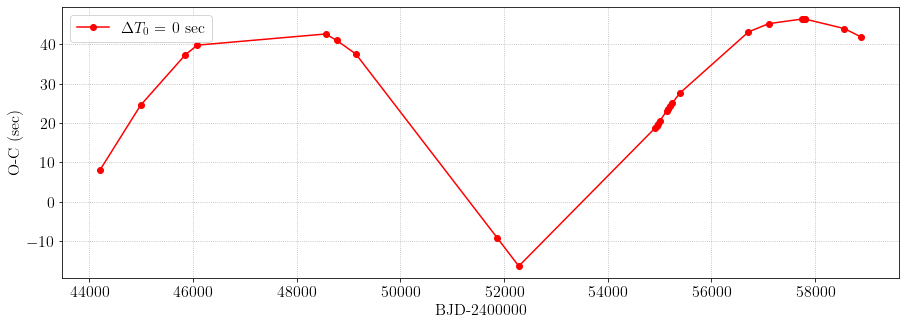

In [9]:
InputFile_out = "dT0_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label=r'$\Delta T_{0}$ = 0 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [10]:
#Parameters
m = 0.0000
c = 2
K = 33.7       
P = 10220       
e = 0.39               
w = -1.36          
tau = 53025  

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("dT0_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 10.117244365488052
44993.45298 1.3454457543433849 1.7304837947369647 26.502456065122587
45851.40631 1.8729095270735001 2.1904097107400955 39.275113887679446
46086.96681 2.017730493076619 2.3067856169900147 41.787185633500556
48560.5578 3.5384771236382466 3.4282176707010223 44.62602891771586
48773.71401 3.6695240871222086 3.52399532486365 43.00300599709693
49143.77505 3.8970350547628696 3.6927893114212127 39.52514702188121
51870.83925 5.573615261531505 5.235835707425898 -7.244184996025201
52284.71018 5.828060246506533 5.574122319177708 -14.386856330253462
54919.76589 1.164888962876034 1.5548393120535615 20.818403535244894
54941.30349 1.1781301303781755 1.5681287429328055 21.257125244670558
54970.67822 1.1961895111940648 1.5861435821963046 21.850025412352373
54999.31317 1.2137940803830882 1.603584462058827 22.42187386990452
55135.97098 1.2978103566945678 1.6852583416525755 25.066322648979273
55159.94602 1.3125500454486845 1.699332763313223 

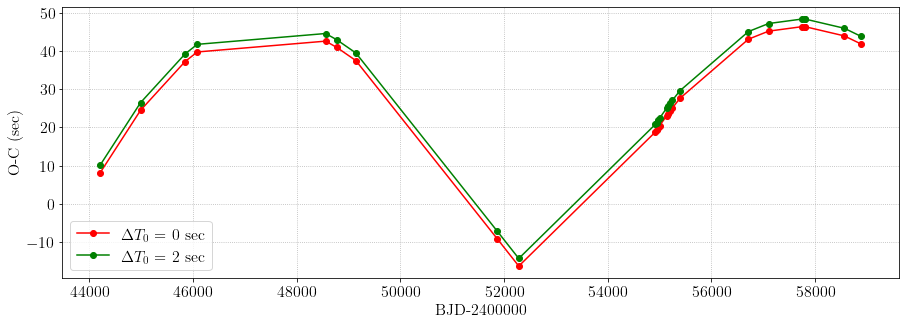

In [11]:
InputFile_out = "dT0_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-o', color='green',label=r'$\Delta T_{0}$ = 2 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [12]:
#Parameters
m = 0.0000
c = 4
K = 33.7       
P = 10220       
e = 0.39               
w = -1.36          
tau = 53025  

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("dT0_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 12.117244365488052
44993.45298 1.3454457543433849 1.7304837947369647 28.502456065122587
45851.40631 1.8729095270735001 2.1904097107400955 41.275113887679446
46086.96681 2.017730493076619 2.3067856169900147 43.787185633500556
48560.5578 3.5384771236382466 3.4282176707010223 46.62602891771586
48773.71401 3.6695240871222086 3.52399532486365 45.00300599709693
49143.77505 3.8970350547628696 3.6927893114212127 41.52514702188121
51870.83925 5.573615261531505 5.235835707425898 -5.244184996025201
52284.71018 5.828060246506533 5.574122319177708 -12.386856330253462
54919.76589 1.164888962876034 1.5548393120535615 22.818403535244894
54941.30349 1.1781301303781755 1.5681287429328055 23.257125244670558
54970.67822 1.1961895111940648 1.5861435821963046 23.850025412352373
54999.31317 1.2137940803830882 1.603584462058827 24.42187386990452
55135.97098 1.2978103566945678 1.6852583416525755 27.066322648979273
55159.94602 1.3125500454486845 1.699332763313223 

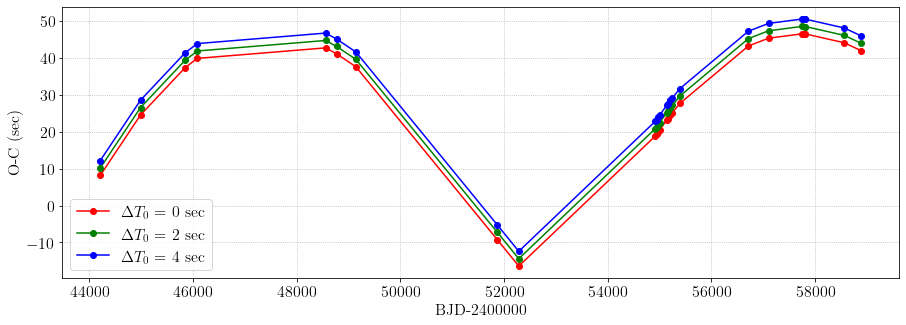

In [14]:
InputFile_out = "dT0_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-o', color='green',label=r'$\Delta T_{0}$ = 2 sec')
plt.plot(x_c, y_c, '-o', color='blue',label=r'$\Delta T_{0}$ = 4 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [15]:
#Parameters
m = 0.0000
c = 6
K = 33.7       
P = 10220       
e = 0.39               
w = -1.36          
tau = 53025  

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("dT0_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

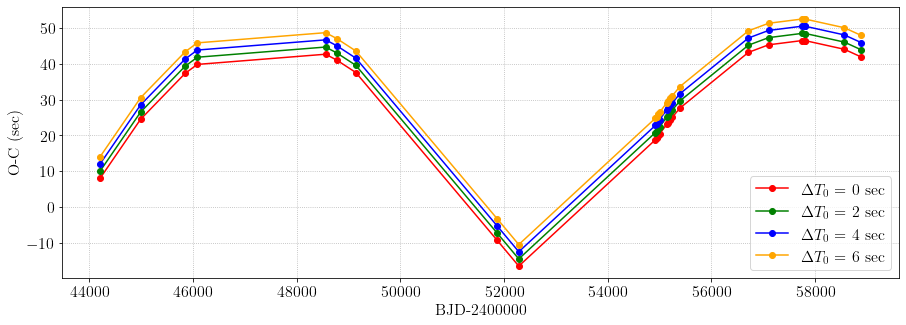

In [16]:
InputFile_out = "dT0_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-o', color='green',label=r'$\Delta T_{0}$ = 2 sec')
plt.plot(x_c, y_c, '-o', color='blue',label=r'$\Delta T_{0}$ = 4 sec')
plt.plot(x_d, y_d, '-o', color='orange',label=r'$\Delta T_{0}$ = 6 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
m = 0.0000
c = 8
K = 33.7       
P = 10220       
e = 0.39               
w = -1.36          
tau = 53025  

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("dT0_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

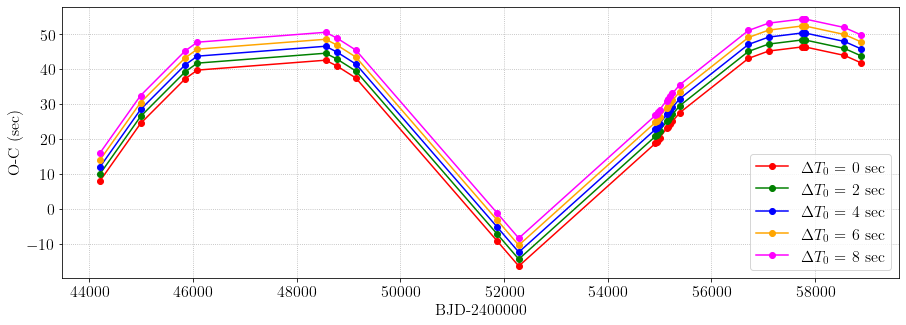

In [19]:
InputFile_out = "dT0_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-o', color='green',label=r'$\Delta T_{0}$ = 2 sec')
plt.plot(x_c, y_c, '-o', color='blue',label=r'$\Delta T_{0}$ = 4 sec')
plt.plot(x_d, y_d, '-o', color='orange',label=r'$\Delta T_{0}$ = 6 sec')
plt.plot(x_e, y_e, '-o', color='magenta',label=r'$\Delta T_{0}$ = 8 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_dT0_rev.pdf", format='pdf', dpi=1200)
plt.show()